Training Data Confusion Matrix:
[[  6  23]
 [  0 871]]
Training Data Metrics:
Precision: 0.974
Recall: 1.000
F1-score: 0.987


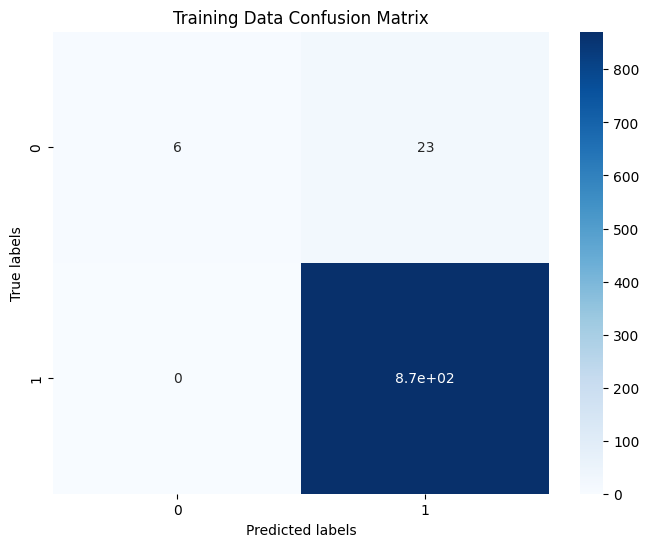

Test Data Confusion Matrix:
[[  0   6]
 [  1 219]]
Test Data Metrics:
Precision: 0.973
Recall: 0.995
F1-score: 0.984


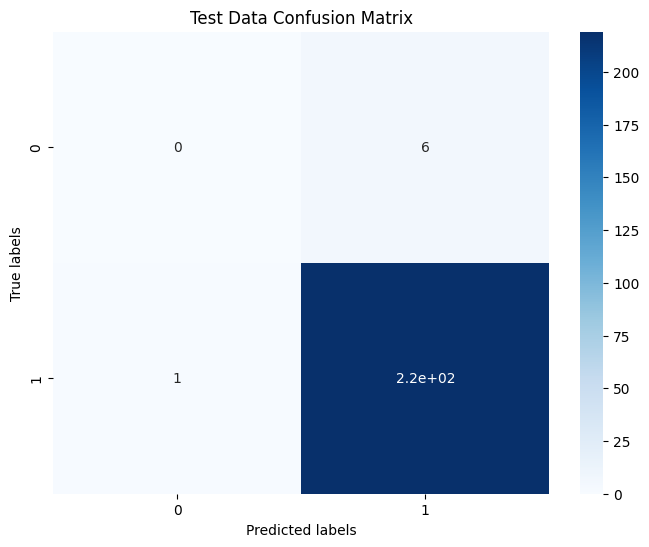

In [ ]:
# A1. Please evaluate confusion matrix for your classification problem
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Spliting the dataset into features (X) and target (y)
X = df.drop('output', axis=1)
y = df['output']

# Binarize the target variable using a threshold
y_binary = (y > 0.5).astype(int)

# Spliting the data into training and test sets with test_size =0.2.
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Training a KNN regressor model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train_binary)

# Predicting based on the training data
y_pred_train_binary = (knn.predict(X_train) > 0.5).astype(int)

# Evaluating the model based on the training data
conf_mat_train = confusion_matrix(y_train_binary, y_pred_train_binary)
print("Training Data Confusion Matrix:")
print(conf_mat_train)

precision_train = precision_score(y_train_binary, y_pred_train_binary)
recall_train = recall_score(y_train_binary, y_pred_train_binary)
f1_train = f1_score(y_train_binary, y_pred_train_binary)
print("Training Data Metrics:")
print(f"Precision: {precision_train:.3f}")
print(f"Recall: {recall_train:.3f}")
print(f"F1-score: {f1_train:.3f}")

# Ploting the training data based on the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_train, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Training Data Confusion Matrix')
plt.show()

# Predicting based on the test data
y_pred_test_binary = (knn.predict(X_test) > 0.5).astype(int)
# Evaluate the model on the test data
confusion_matrix_test = confusion_matrix(y_test_binary, y_pred_test_binary)
print("Test Data Confusion Matrix:")
print(confusion_matrix_test)

precision_test = precision_score(y_test_binary, y_pred_test_binary)
recall_test = recall_score(y_test_binary, y_pred_test_binary)
f1_test = f1_score(y_test_binary, y_pred_test_binary)
print("Test Data Metrics:")
print(f"Precision: {precision_test:.3f}")
print(f"Recall: {recall_test:.3f}")
print(f"F1-score: {f1_test:.3f}")

# Ploting the test data to get the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Data Confusion Matrix')
plt.show()

In [ ]:
# A2 Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Loading the data
df = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name='Purchase data')

# Selecting only numeric columns for calculations
df_numeric = df.select_dtypes(include=[np.number])

# Spliting the data into actual and predicted values
actual_df = df_numeric.iloc[:, :5]  # Select the first 5 numeric columns as actual values

# Selecting the corresponding predicted values for the 5 features
predicted_df = df_numeric.iloc[:, 5:10]  # Select the corresponding 5 predicted values

# Calculating MSE, RMSE, MAPE, and R2 scores
mse_scores = np.mean((actual_df - predicted_df) ** 2, axis=0)
rmse_scores = np.sqrt(mse_scores.fillna(0))

# Handling potential division by zero in MAPE calculation
mape_scores = np.mean(np.abs((actual_df - predicted_df) / actual_df.replace(0, np.nan)), axis=0) * 100
mape_scores = mape_scores.fillna(0) # Replace NaN with 0 for MAPE

# Calculating R2 score
r2_scores = r2_score(actual_df.fillna(0), predicted_df.fillna(0), multioutput='uniform_average') # Replace NaN with 0 for R2

# Creating a new DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAPE': mape_scores,
    'R2': r2_scores
})

print(metrics_df)

                  MSE  RMSE  MAPE       R2
Candies (#)       NaN   0.0   0.0 -8.83202
Mangoes (Kg)      NaN   0.0   0.0 -8.83202
Milk Packets (#)  NaN   0.0   0.0 -8.83202
Payment (Rs)      NaN   0.0   0.0 -8.83202
Unnamed: 10       NaN   0.0   0.0 -8.83202
Unnamed: 5        NaN   0.0   0.0 -8.83202
Unnamed: 6        NaN   0.0   0.0 -8.83202
Unnamed: 7        NaN   0.0   0.0 -8.83202
Unnamed: 8        NaN   0.0   0.0 -8.83202
Unnamed: 9        NaN   0.0   0.0 -8.83202


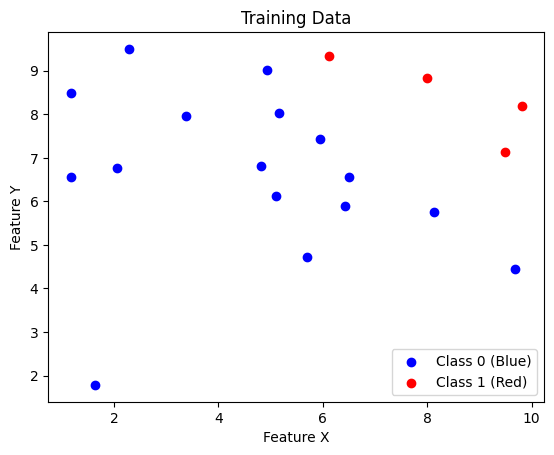

In [ ]:
# A3 Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10.
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/TRAINING_DATA.xlsx')
# Generate 20 random data points with 2 features (X & Y) between 1 and 10
np.random.seed(0)
X = np.random.uniform(1, 10, (20, 2))

# Assign classes based on the values of X
classes = np.zeros(20, dtype=int)
classes[X[:, 0] + X[:, 1] > 15] = 1

# Create a scatter plot of the training data
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], c='blue', label='Class 0 (Blue)')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], c='red', label='Class 1 (Red)')

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


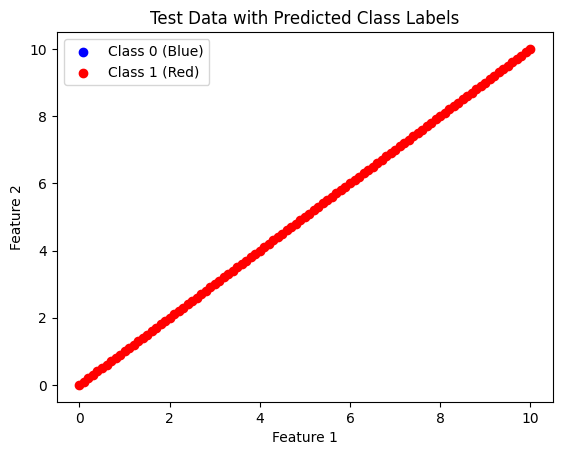

In [ ]:
# A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the training data
df_train = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Select the feature columns (385 columns)
X_train = df_train.iloc[:, :-1]  # assuming the last column is the class label

# Select the class label column
y_train = df_train.iloc[:, -1]

# Convert the target variable to discrete classes if it's continuous
# For example, if you want to classify values above 0.5 as class 1 and below as class 0:
y_train_binary = (y_train > 0.5).astype(int)

# Create a kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data using the binarized target
knn.fit(X_train, y_train_binary) # Use y_train_binary here

# Generate test set data with values of X varying between 0 and 10 with increments of 0.1
# (you can adjust the range and increment as needed)
X_test = np.arange(0, 10.1, 0.1)
X_test = np.repeat(X_test, 384)  # repeat the values to match the number of columns
X_test = X_test.reshape(-1, 384)  # reshape to match the shape of the training data

# Predict the class labels for the test data
y_pred = knn.predict(X_test)

# Create a scatter plot of the test data with predicted class labels
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='blue', label='Class 0 (Blue)')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='red', label='Class 1 (Red)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data with Predicted Class Labels')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not 

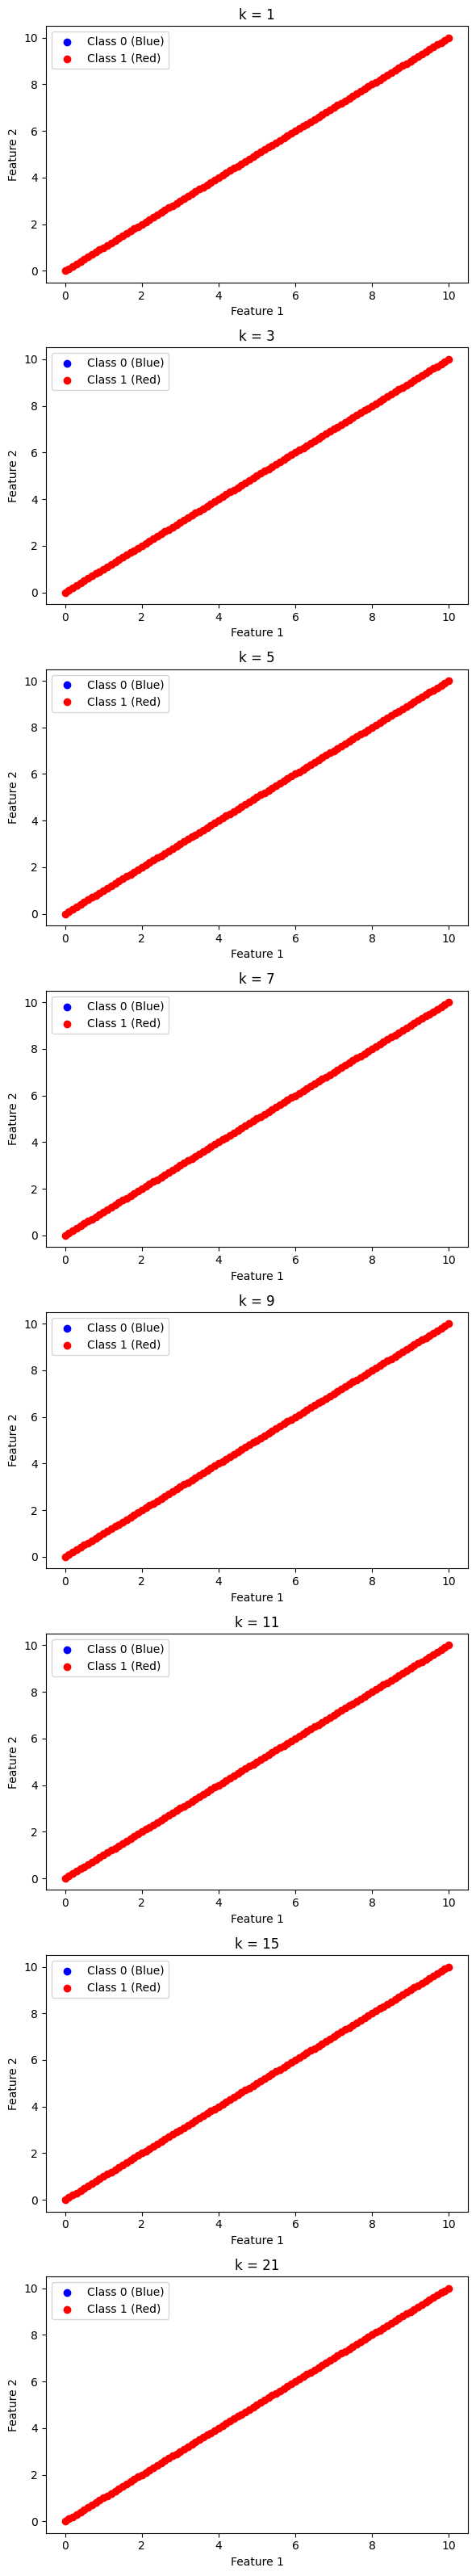

In [ ]:
# A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the training data
df_train = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Select the feature columns (385 columns)
X_train = df_train.iloc[:, :-1]  # assuming the last column is the class label

# Select the class label column
y_train = df_train.iloc[:, -1]

y_train_binary = (y_train > 0.5).astype(int)

# Generate test set data with values of X varying between 0 and 10 with increments of 0.1
X_test = np.arange(0, 10.1, 0.1)
X_test = np.repeat(X_test, 384)  # repeat the values to match the number of columns
X_test = X_test.reshape(-1, 384)  # reshape to match the shape of the training data

# Define a list of k values to try
k_values = [1, 3, 5, 7, 9, 11, 15, 21]

# Create a figure with subplots for each k value
fig, axs = plt.subplots(nrows=len(k_values), ncols=1, figsize=(6, 4*len(k_values)))

for i, k in enumerate(k_values):
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the kNN classifier on the training data
    knn.fit(X_train, y_train_binary)

    # Predict the class labels for the test data
    y_pred = knn.predict(X_test)

    # Create a scatter plot of the test data with predicted class labels
    axs[i].scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='blue', label='Class 0 (Blue)')
    axs[i].scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='red', label='Class 1 (Red)')

    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].set_title(f'k = {k}')
    axs[i].legend()

plt.tight_layout()
plt.show()

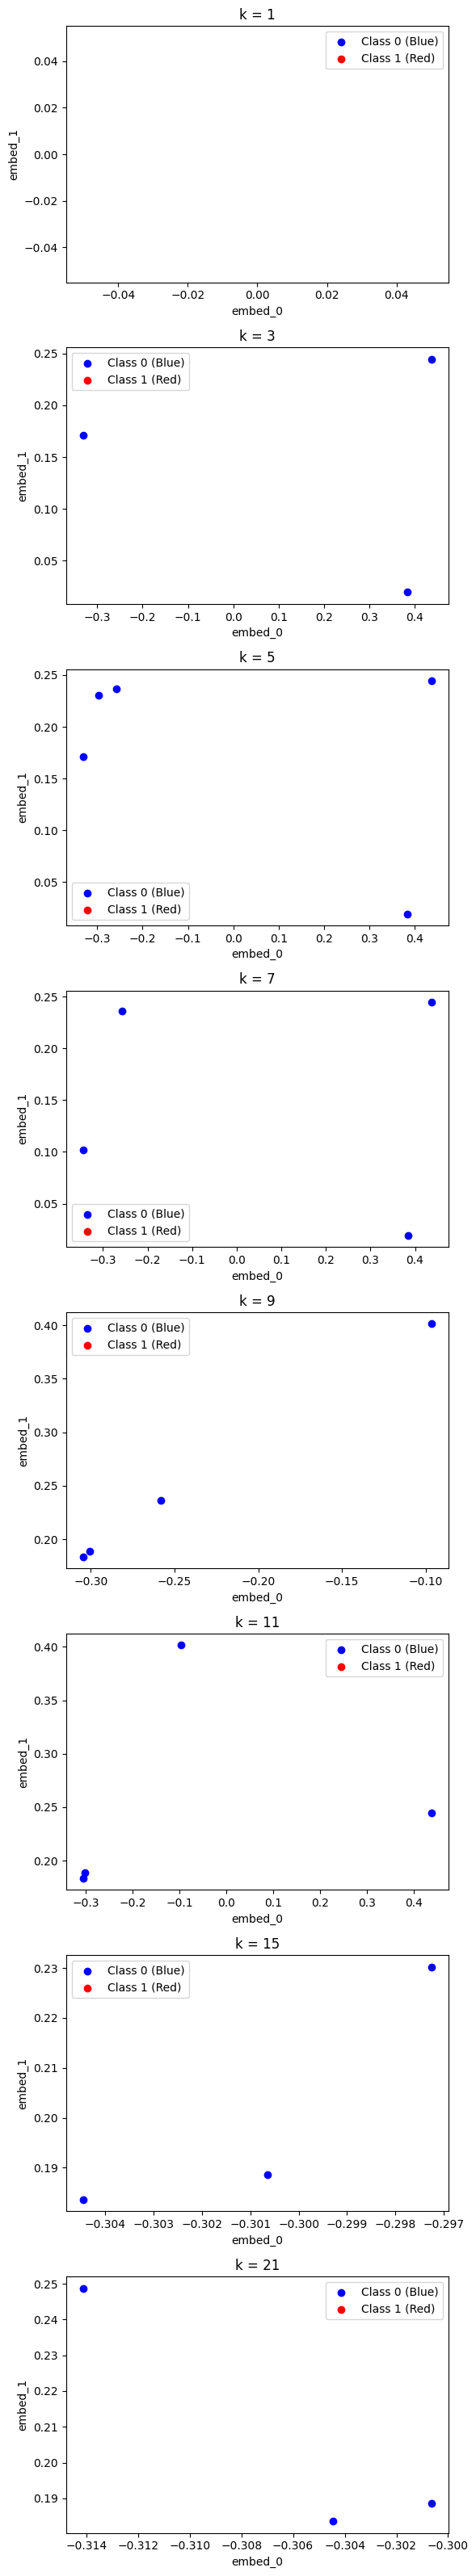

In [ ]:
# A6.Repeat the exercises A3 to A5 for your project data considering any two features and classes.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Split the dataset into training and testing sets
X = df[['embed_0', 'embed_1']]
y = df['OUTPUT']

# Convert continuous target variable to discrete classes using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of k values to try
k_values = [1, 3, 5, 7, 9, 11, 15, 21]

# Create a figure with subplots for each k value
fig, axs = plt.subplots(nrows=len(k_values), ncols=1, figsize=(6, 4*len(k_values)))

for i, k in enumerate(k_values):
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the kNN classifier on the training data
    knn.fit(X_train, y_train)

    # Predict the class labels for the test data
    y_pred = knn.predict(X_test)

    # Create a scatter plot of the test data with predicted class labels
    axs[i].scatter(X_test['embed_0'][y_pred == 0], X_test['embed_1'][y_pred == 0], c='blue', label='Class 0 (Blue)')
    axs[i].scatter(X_test['embed_0'][y_pred == 1], X_test['embed_1'][y_pred == 1], c='red', label='Class 1 (Red)')

    axs[i].set_xlabel('embed_0')
    axs[i].set_ylabel('embed_1')
    axs[i].set_title(f'k = {k}')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
# kNN classifier. This is called hyper-parameter tuning.
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the Excel file
df = pd.read_excel('/content/TRAINING_DATA.xlsx')

# Assume the target variable is in the last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int) # Also binarize y_test for consistency
# Define the kNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_binary)

# Get the best hyperparameters and the corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value\n {best_k} with accuracy\n {best_score:.3f}")

# Train a new kNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train_binary)

# Evaluate the best kNN classifier on the test set
y_pred = best_knn.predict(X_test)
print(f"Test accuracy\n {best_knn.score(X_test, y_test_binary):.3f}")

Best k value
 3 with accuracy
 0.971
Test accuracy
 0.965
